# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

### Overview

In this notebook our task will be to perform machine learning regression on noisy data with a Neural Network (NN).

We will explore how the ability to fit depends on the structure of the NN. The goal is also to build intuition about why prediction is difficult.

### The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$

We will refer to the $f(x_i)$ as the **true features** used to generate the data.

To make predictions, we will consider a NN that depends on its parameters, weights and biases. The functions that the NN can model respresent the **model class** that we are using to try to model the data and make predictions.

To learn the parameters of the NN, we will train our models on a **training data set** and then test the effectiveness of the NN on a *different* dataset, the **validation data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

We will try to get a qualitative picture by examining plots on validation and training data.

### Linear fit

We start by considering the very simple case:
$$
f(x)=2x+1
$$

Let's start defining the parameters of an ideal linear function which we are going to predict through a neural network regression

In [1]:
# DEFINE PERFECT LINE
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect
print('slope and intercept defined')

slope and intercept defined


Now let's generate a set of input data which will slightly deviate from our ideal behaviour using a random noise (that actually is set to zero):

In [2]:
# CREATE DATASETS
import numpy as np

# generate training inputs
np.random.seed(0)
N_train = 10000
N_valid = 1000
x_train = np.random.uniform(-1, 1, N_train)
x_valid = np.random.uniform(-1, 1, N_valid)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.5 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma) # measured to use in testing phase
print('datasets created')

datasets created


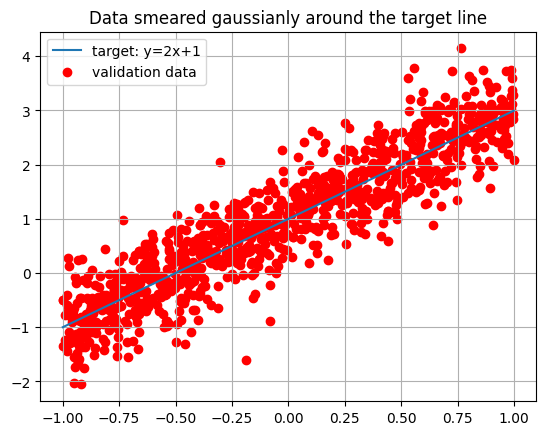

In [3]:
# PLOT
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label=f'target: y={m}x+{b}')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.title('Data smeared gaussianly around the target line')
plt.legend()
plt.grid(True)
plt.show()

If you remember how a single node of a neural network works, you can easily spot that **just a single neuron can make the job**. So let's start using a simple Sequential model with just one layer on one neuron only!

In [4]:
# NEURAL NETWORK SETUP
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential() # initializes a sequential model, which is a linear stack of layers
model.add(Dense(1, input_shape=(1,))) # adds a dense (fully connected) layer with a single neuron; the input_shape=(1,) indicates that the input to this layer is a single feature

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
# optimizer='sgd': specifies the Stochastic Gradient Descent (SGD) optimizer for training the model.
# loss='mse': specifies Mean Squared Error (MSE) as the loss function to be minimized during training. This is common for regression problems.
# metrics=['mse']: specifies that MSE should also be used as a metric to evaluate the model's performance during training and testing.
print('NN composed')

NN composed


In [5]:
# SUMMARY
# get a summary of our composed model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


We are now going to train our model, that is we feed the neuron with the set of training pair x, y_train from which the optimizer will find the best weights to minimize the Mean Square Error loss function (out linear regression function).

In [6]:
# TRAINING
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
N_epochs = 40
N_batch = 100
history = model.fit(x=x_train, y=y_train,
          batch_size=N_batch, epochs=N_epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid)) # provide the fit funct. w/ validation data as well

Epoch 1/40
100/100 [==============================] - 2s 9ms/step - loss: 0.6889 - mse: 0.6889 - val_loss: 0.3670 - val_mse: 0.3670
Epoch 2/40
100/100 [==============================] - 0s 4ms/step - loss: 0.3028 - mse: 0.3028 - val_loss: 0.2787 - val_mse: 0.2787
Epoch 3/40
100/100 [==============================] - 1s 6ms/step - loss: 0.2601 - mse: 0.2601 - val_loss: 0.2582 - val_mse: 0.2582
Epoch 4/40
100/100 [==============================] - 0s 4ms/step - loss: 0.2500 - mse: 0.2500 - val_loss: 0.2528 - val_mse: 0.2528
Epoch 5/40
100/100 [==============================] - 1s 7ms/step - loss: 0.2474 - mse: 0.2474 - val_loss: 0.2511 - val_mse: 0.2511
Epoch 6/40
100/100 [==============================] - 0s 5ms/step - loss: 0.2468 - mse: 0.2468 - val_loss: 0.2506 - val_mse: 0.2506
Epoch 7/40
100/100 [==============================] - 1s 6ms/step - loss: 0.2466 - mse: 0.2466 - val_loss: 0.2504 - val_mse: 0.2504
Epoch 8/40
100/100 [==============================] - 1s 10ms/step - loss: 0

By looking at weights and biases we can see if the linear fit was successfull: $w_1$ represents the angular coefficient, $b$ the intercept.

In [7]:
# RESULTS
# return weights and biases
model.get_weights()

[array([[1.9940392]], dtype=float32), array([1.0039984], dtype=float32)]

In [8]:
# PERFORMANCE EVALUATION WITH NEVER SEEN DATA
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
# print performance
print('WITH NEVER-SEEN-BEFORE DATA')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

32/32 [==============================] - 0s 2ms/step - loss: 0.2502 - mse: 0.2502
WITH NEVER-SEEN-BEFORE DATA
Test loss: 0.2501768171787262
Test accuracy: 0.2501768171787262


In [9]:
# PERFORMANCE EVALUATION WITH EXACT CURVE
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)
# print performance
print('WITH DATA FROM THE EXACT CURVE')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

32/32 [==============================] - 0s 2ms/step - loss: 2.9061e-05 - mse: 2.9061e-05
WITH DATA FROM THE EXACT CURVE
Test loss: 2.9060858651064336e-05
Test accuracy: 2.9060858651064336e-05


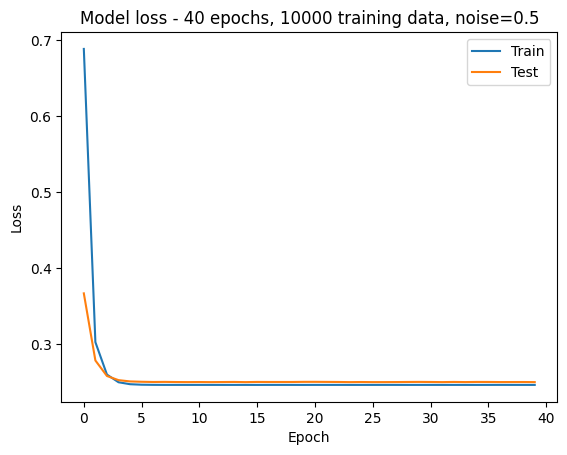

In [10]:
# LOSS
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss']) # during training
plt.plot(history.history['val_loss']) # during validation
plt.title(f'Model loss - {N_epochs} epochs, {N_train} training data, noise={sigma}')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

4/4 [==============================] - 0s 4ms/step


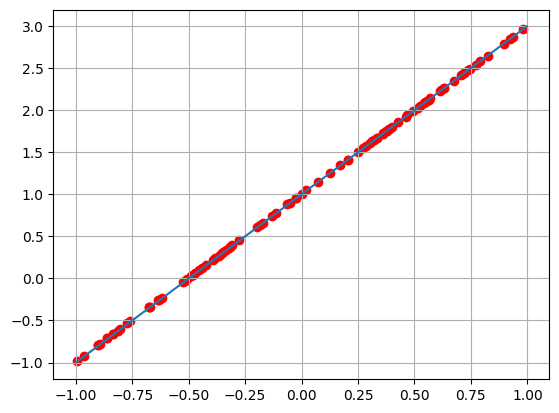

In [11]:
# USE THE OBTAINED PARAMETERS TO SAMPLE NEW DATA
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

_________________________
_________________________
### Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the **number of epochs**, $N_{\mathrm{epochs}}$, the **number of training data** points $N_{\mathrm{train}}$ and on the **noise** $\sigma$. Try to improve the previous result operating on these parameters.


_________________________
_________________________
### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

In order to make practice with NN, explore reasonable different choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Make graphs comparing fits for different NNs.
Check your NN models by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set?
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

_______
Let us first define a **third degree polynomial** $f(x) = c_0 + c_1 x + c_2 x^2 + c_3 x^3$ and create the datasets for training and testing as well.  

polynomial defined
datasets created



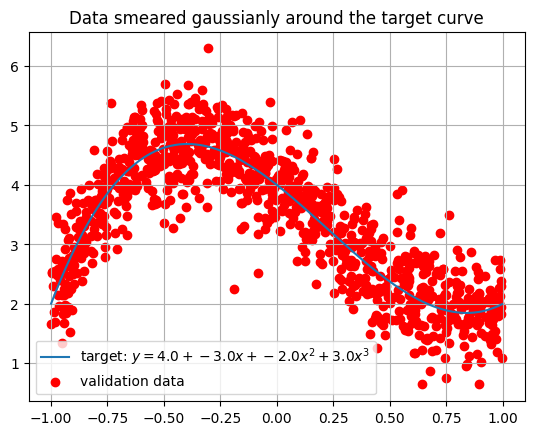

In [12]:
# DEFINE PERFECT POLYNOMIAL
# target parameters of f(x) = c_0 + c_1 x + c_2 x^2 + c_3 x^3
c_0 = 4.0
c_1 = -3.0
c_2 = -2.0
c_3 = 3.0
def polyn(x):
  return ( c_0 + c_1*x + c_2*x**2 + c_3*x**3 )
print('polynomial defined')

# CREATE DATASETS
import numpy as np
# generate training inputs
np.random.seed(0)
N_train = 10000
N_valid = 1000
x_train = np.random.uniform(-1, 1, N_train)
x_valid = np.random.uniform(-1, 1, N_valid)
x_valid.sort() # sort before plotting, otherwise the connection between point will appear badly
y_target = polyn(x_valid) # ideal (target) polynomial
# dataset generation
sigma = 0.5 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(polyn(x_train), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(polyn(x_valid), sigma) # measures to use in testing phase
print('datasets created')
print()

# PLOT
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label=f'target: $y={c_0}+{c_1}x+{c_2}x^2+{c_3}x^3$')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.title('Data smeared gaussianly around the target curve')
plt.legend()
plt.grid(True)
plt.show()

Then, we define a **neural network**, whose **structure** is resumed below. The **activation function** chosen for neurons is the [`relu`](https://keras.io/api/layers/activations/).

In [13]:
# NEURAL NETWORK SETUP
# Define the neural network model
model = keras.Sequential([
    keras.layers.Dense(256, input_dim=1, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(1)
])
# Compile the model
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 256)               512       
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 198145 (774.00 KB)
Trainable params: 198145 (774.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


When using neural networks, the choice of the complexity of its structure is crucial to the two main aspects of machine learning, i.e. **capturing the complexity** of the function we are trying to reproduce while still reducing enough the **uncertainty** about parameters.
For example, there is no way that a third-degree polynomial can be accurately reproduced by a single layer made of one neuron, because the underlying transformation between a neuron and the following is an [affinity](https://en.wikipedia.org/wiki/Affine_transformation) composed with some [activation function](https://en.wikipedia.org/wiki/Activation_function#Table_of_activation_functions). In other words, the task comes down to finidng the **bias-variance tradeoff**.

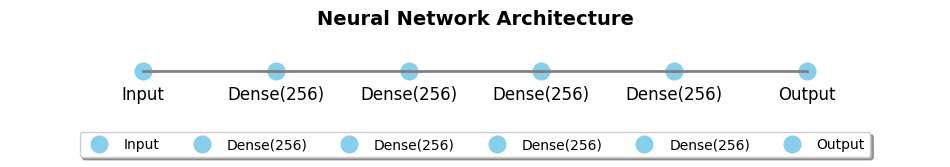

In [14]:
import matplotlib.pyplot as plt

# Define node positions
positions = {
    'Input': (0, 0),
    'Dense(256)_1': (1, 0),
    'Dense(256)_2': (2, 0),
    'Dense(256)_3': (3, 0),
    'Dense(256)_4': (4, 0),
    'Output': (5, 0)
}

# Define node labels
labels = {
    'Input': 'Input',
    'Dense(256)_1': 'Dense(256)',
    'Dense(256)_2': 'Dense(256)',
    'Dense(256)_3': 'Dense(256)',
    'Dense(256)_4': 'Dense(256)',
    'Output': 'Output'
}

# Define connections
connections = [('Input', 'Dense(256)_1'),
               ('Dense(256)_1', 'Dense(256)_2'),
               ('Dense(256)_2', 'Dense(256)_3'),
               ('Dense(256)_3', 'Dense(256)_4'),
               ('Dense(256)_4', 'Output')]

# Plot settings
plt.figure(figsize=(12, 1))  # Set figure size

# Draw nodes
for node, pos in positions.items():
    plt.plot(pos[0], pos[1], 'o', markersize=12, color='skyblue', label=labels[node])  # Larger node size, blue color
    plt.text(pos[0], pos[1]-0.3, labels[node], ha='center', va='center', fontsize=12, color='black')  # Centered text

# Draw connections
for connection in connections:
    plt.plot([positions[connection[0]][0], positions[connection[1]][0]],
             [positions[connection[0]][1], positions[connection[1]][1]],
             '-', color='gray', linewidth=2)  # Gray lines

# Adjust plot limits and appearance
plt.xlim(-1, 6)
plt.ylim(-0.5, 0.5)
plt.axis('off')
plt.title('Neural Network Architecture', fontsize=14, fontweight='bold')  # Title with increased font size and bold
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=6, fontsize=10)  # Legend outside the plot
plt.show()

Now we start the training phase and, thanks to the **backpropagation algorithm**, the network roams in the parameters space following the [adam](https://keras.io/api/optimizers/adam/) variant of the stochastic gradient descent, trying to **reduce the loss function**, defined as the Mean Squared Error ([MSE](https://keras.io/api/losses/regression_losses/#meansquarederror-class)). The same loss function measures also the performance of the trained network during the testing on new data.

In [15]:
# TRAINING
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
N_epochs = 50
N_batch = 200

'''
from IPython.display import clear_output

class PlotCurrentEstimate(tf.keras.callbacks.Callback):
    def __init__(self, x_valid, y_valid):
        """Keras Callback which plot current model estimate against reference target"""

        # convert numpy arrays into lists for plotting purposes
        self.x_valid = list(x_valid[:])
        self.y_valid = list(y_valid[:])
        self.iter=0

    def on_epoch_end(self, epoch, logs={}):

        temp = self.model.predict(self.x_valid, batch_size=None, verbose=False, steps=None)
        self.y_curr = list(temp[:]) # convert numpy array into list

        self.iter+=1
        if self.iter%10 == 0:
            clear_output(wait=True)
            self.eplot = plt.subplot(1,1,1)
            self.eplot.clear()
            self.eplot.scatter(self.x_valid, self.y_curr, color="blue", s=4, marker="o", label="estimate")
            self.eplot.scatter(self.x_valid, self.y_valid, color="red", s=4, marker="x", label="valid")
            self.eplot.legend()

            plt.show()

plot_estimate = PlotCurrentEstimate(x_valid, y_valid)

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                  min_delta=0, patience=100, mode='auto')
'''
history = model.fit(x=x_train, y=y_train,
          batch_size=N_batch, epochs=N_epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))#, callbacks=[ plot_estimate, earlystop]) # provide the fit funct. w/ validation data as well

Epoch 1/50
50/50 [==============================] - 2s 15ms/step - loss: 3.5299 - val_loss: 0.6901
Epoch 2/50
50/50 [==============================] - 1s 11ms/step - loss: 0.3811 - val_loss: 0.2749
Epoch 3/50
50/50 [==============================] - 1s 10ms/step - loss: 0.2610 - val_loss: 0.2819
Epoch 4/50
50/50 [==============================] - 1s 11ms/step - loss: 0.2583 - val_loss: 0.2523
Epoch 5/50
50/50 [==============================] - 1s 10ms/step - loss: 0.2540 - val_loss: 0.2539
Epoch 6/50
50/50 [==============================] - 1s 12ms/step - loss: 0.2554 - val_loss: 0.2570
Epoch 7/50
50/50 [==============================] - 1s 11ms/step - loss: 0.2506 - val_loss: 0.2506
Epoch 8/50
50/50 [==============================] - 1s 12ms/step - loss: 0.2523 - val_loss: 0.2556
Epoch 9/50
50/50 [==============================] - 1s 11ms/step - loss: 0.2556 - val_loss: 0.2532
Epoch 10/50
50/50 [==============================] - 1s 11ms/step - loss: 0.2611 - val_loss: 0.2573
Epoch 11/

In [16]:
# RESULTS
# uncomment to return weights and biases
# model.get_weights()

In [17]:
# PERFORMANCE EVALUATION WITH NEVER SEEN DATA
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
# print performance
print('WITH NEVER-SEEN-BEFORE DATA')
print('Score:', score)
# PERFORMANCE EVALUATION WITH EXACT CURVE
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)
# print performance
print('WITH DATA FROM THE EXACT CURVE')
print('Score:', score)

32/32 [==============================] - 0s 3ms/step - loss: 0.2520
WITH NEVER-SEEN-BEFORE DATA
Score: 0.2520207464694977
32/32 [==============================] - 0s 3ms/step - loss: 0.0031
WITH DATA FROM THE EXACT CURVE
Score: 0.003142104484140873


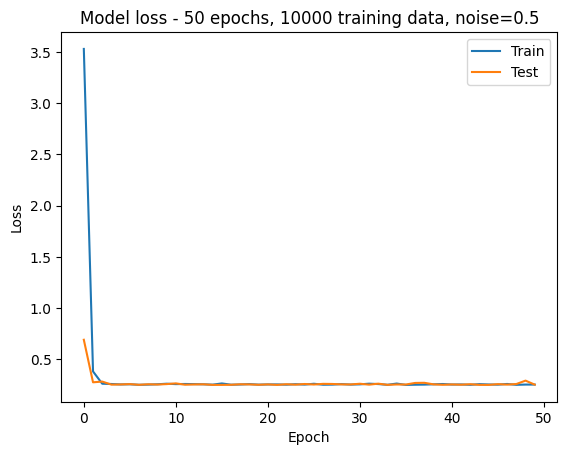

In [18]:
# LOSS
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss']) # during training
plt.plot(history.history['val_loss']) # during validation
plt.title(f'Model loss - {N_epochs} epochs, {N_train} training data, noise={sigma}')
plt.ylabel('Loss')
#plt.ylim(0,2)
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

4/4 [==============================] - 0s 4ms/step


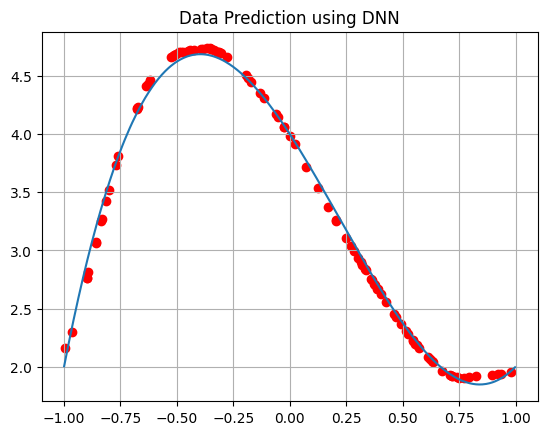

In [19]:
# USE THE OBTAINED PARAMETERS TO SAMPLE NEW DATA
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted, color='r')
plt.title('Data Prediction using DNN')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

4/4 [==============================] - 0s 4ms/step


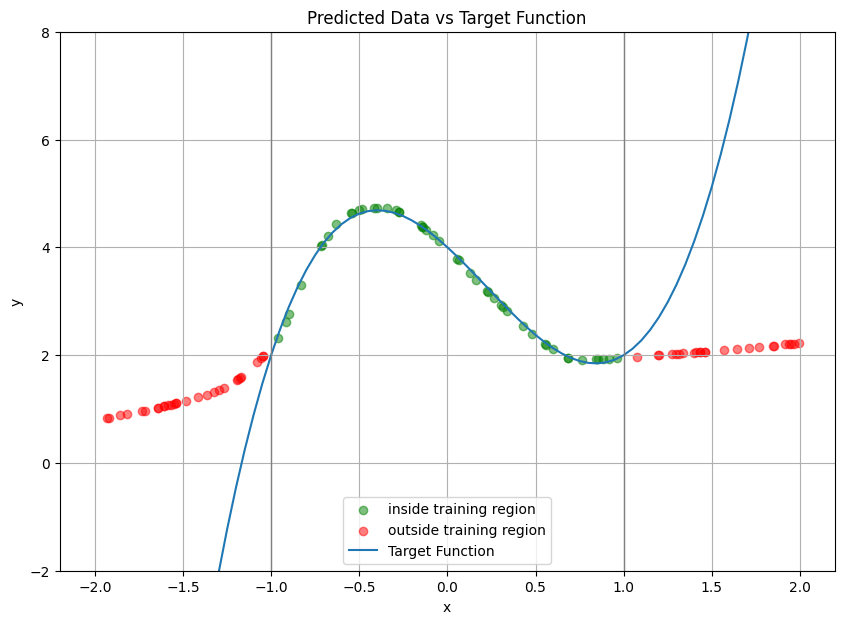

In [20]:
import numpy as np
import matplotlib.pyplot as plt
# Generate new data
x_predicted = np.random.uniform(-2, 2, 100)  # Extend the plot zone to (-2, 2) for better visualization
y_predicted = model.predict(x_predicted)
x_target = np.arange(-2, 2, 0.05)
y_target_wider = polyn(x_target)
# Determine which points are inside the trained region
trained_region = (x_predicted > -1) & (x_predicted < 1)
# Plot the results
plt.figure(figsize=(10, 7))
# Plot points inside the trained region in green
plt.scatter(x_predicted[trained_region], y_predicted[trained_region], color='g', alpha=0.5, label='inside training region')
# Plot points outside the trained region in red
plt.scatter(x_predicted[~trained_region], y_predicted[~trained_region], color='r', alpha=0.5, label='outside training region')
plt.plot(x_target, y_target_wider, label='Target Function')
plt.axvline(x=-1, color='gray', linestyle='-', linewidth=1)  # Solid line at x=-1
plt.axvline(x=1, color='gray', linestyle='-', linewidth=1)   # Solid line at x=1
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-2,8)
plt.title('Predicted Data vs Target Function')
plt.legend()
plt.show()


_________________________
_________________________
### Exercise 11.3
  
Try to extend the model to fit a simple **trigonometric 2D function** such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

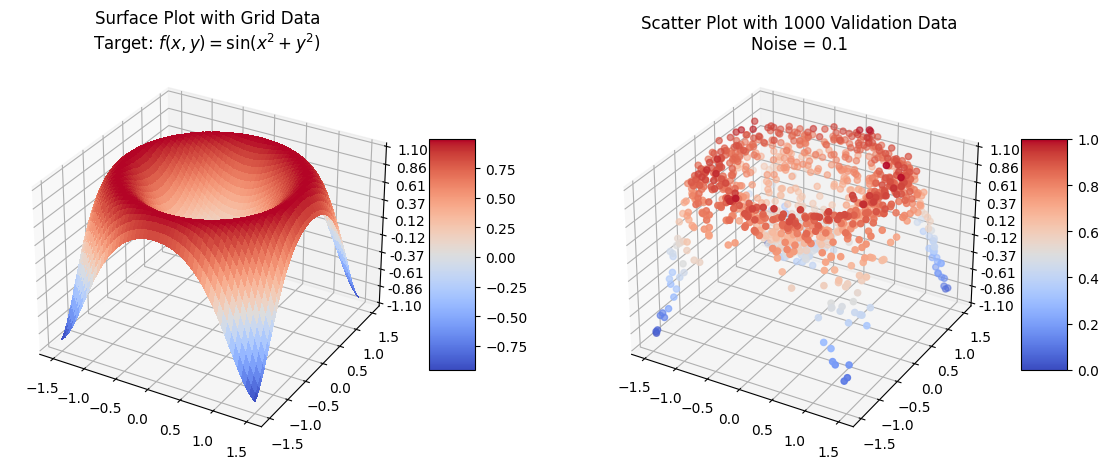

In [25]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D #<-- Note the capitalization!
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

# Define the domain
x_min = -3./2.
x_max = 3./2.
y_min = -3./2.
y_max = 3./2.
# Define the function
def twoDsine(x, y):
    return np.sin(x ** 2 + y ** 2)
# Generate training inputs (fix seed for reproducibility)
np.random.seed(0)
N_train = 10000
N_valid = 1000
# Input x and y values
x_train = np.random.uniform(x_min, x_max, N_train)
y_train = np.random.uniform(y_min, y_max, N_train)
x_valid = np.random.uniform(x_min, x_max, N_valid)
y_valid = np.random.uniform(y_min, y_max, N_valid)
# z values
z_target = twoDsine(x_valid, y_valid)
# Dataset generation
sigma = 0.1  # Noise standard deviation, for the moment it is absent
z_train = np.random.normal(twoDsine(x_train, y_train), sigma)  # Actual measures from which we want to guess regression parameters
z_valid = np.random.normal(twoDsine(x_valid, y_valid), sigma)  # Measures to use in testing phase
fig = plt.figure(figsize=(14, 6))

####################################################################
# First subplot: grid data
ax1 = fig.add_subplot(121, projection='3d')
# Make data grids
X, Y = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = twoDsine(X, Y)
# Plot the surface
surf1 = ax1.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Customize the z axis
ax1.set_zlim(-1.1, 1.1)
ax1.zaxis.set_major_locator(LinearLocator(10))
ax1.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# Add a color bar which maps values to colors
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)

####################################################################
# Second subplot: validation data as scatter plot
ax2 = fig.add_subplot(122, projection='3d')
# Plot the scatter plot
ax2.scatter(x_valid, y_valid, z_valid, c=z_valid, cmap=cm.coolwarm, marker='o')
# Customize the z axis
ax2.set_zlim(-1.1, 1.1)
ax2.zaxis.set_major_locator(LinearLocator(10))
ax2.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# Add a color bar which maps values to colors
fig.colorbar(cm.ScalarMappable(cmap=cm.coolwarm), ax=ax2, shrink=0.5, aspect=5)

####################################################################
# Titles
ax1.set_title('Surface Plot with Grid Data\nTarget: $f(x,y) = \sin(x^2+y^2)$')
ax2.set_title(f'Scatter Plot with {N_valid} Validation Data\nNoise = {sigma}')
plt.show()

In [26]:
# NEURAL NETWORK SETUP
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
# Define the neural network model
model = keras.Sequential([
    keras.layers.Dense(256, input_dim=2, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(1)
])
# Compile the model
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 256)               768       
                                                                 
 dense_12 (Dense)            (None, 256)               65792     
                                                                 
 dense_13 (Dense)            (None, 256)               65792     
                                                                 
 dense_14 (Dense)            (None, 256)               65792     
                                                                 
 dense_15 (Dense)            (None, 1)                 257       
                                                                 
Total params: 198401 (775.00 KB)
Trainable params: 198401 (775.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


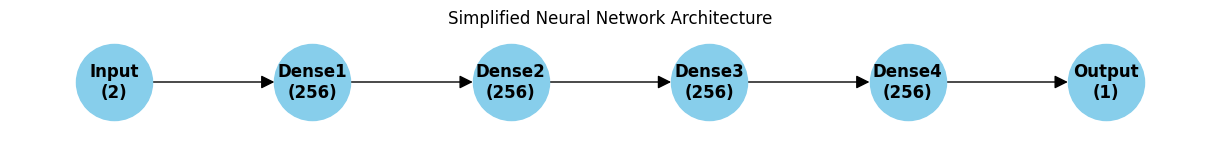

In [27]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Define layer labels
layer_labels = ['Input\n(2)', 'Dense1\n(256)', 'Dense2\n(256)', 'Dense3\n(256)', 'Dense4\n(256)', 'Output\n(1)']

# Add nodes and edges between layers
for i in range(len(layer_labels) - 1):
    G.add_node(layer_labels[i])
    G.add_edge(layer_labels[i], layer_labels[i + 1])
G.add_node(layer_labels[-1])  # Add the last node separately

# Define a layout for the nodes
pos = {label: (i * 2, 0) for i, label in enumerate(layer_labels)}

# Draw the graph
plt.figure(figsize=(12, 1))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=12, font_weight='bold', arrowsize=20)

plt.title('Simplified Neural Network Architecture')
plt.show()

In [28]:
# TRAINING
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
N_epochs = 50
N_batch = 200
input_for_training = np.vstack((x_train, y_train)).T
input_for_validation = np.vstack((x_valid, y_valid)).T

history = model.fit(x=input_for_training, y=z_train,
          batch_size=N_batch, epochs=N_epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(input_for_validation, z_valid))#, callbacks=[ plot_estimate, earlystop]) # provide the fit funct. w/ validation data as well

Epoch 1/50
50/50 [==============================] - 2s 14ms/step - loss: 0.1724 - val_loss: 0.1207
Epoch 2/50
50/50 [==============================] - 1s 10ms/step - loss: 0.0906 - val_loss: 0.0408
Epoch 3/50
50/50 [==============================] - 1s 10ms/step - loss: 0.0243 - val_loss: 0.0144
Epoch 4/50
50/50 [==============================] - 1s 11ms/step - loss: 0.0159 - val_loss: 0.0148
Epoch 5/50
50/50 [==============================] - 1s 10ms/step - loss: 0.0127 - val_loss: 0.0116
Epoch 6/50
50/50 [==============================] - 1s 16ms/step - loss: 0.0120 - val_loss: 0.0115
Epoch 7/50
50/50 [==============================] - 1s 17ms/step - loss: 0.0117 - val_loss: 0.0127
Epoch 8/50
50/50 [==============================] - 1s 17ms/step - loss: 0.0122 - val_loss: 0.0167
Epoch 9/50
50/50 [==============================] - 1s 17ms/step - loss: 0.0115 - val_loss: 0.0107
Epoch 10/50
50/50 [==============================] - 1s 13ms/step - loss: 0.0119 - val_loss: 0.0117
Epoch 11/

16/16 [==============================] - 0s 5ms/step


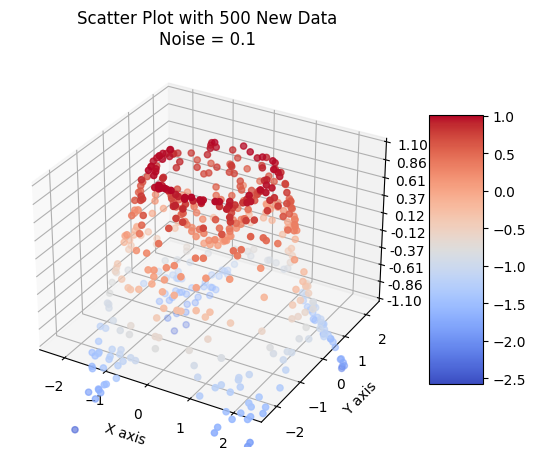

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# Assuming 'model' is already defined and trained elsewhere in your code
# Generate new data for predictions
N_new = 500
side = 2.3
x_predicted = np.random.uniform(-side, side, N_new)
y_predicted = np.random.uniform(-side, side, N_new)
input_for_predictions_data = np.vstack((x_predicted, y_predicted)).T

# Predict z values using the model
z_predicted = model.predict(input_for_predictions_data)

# Create a new figure for plotting
fig = plt.figure(figsize=(14, 7))

# Second subplot: validation data as scatter plot
ax3 = fig.add_subplot(122, projection='3d')

# Plot the scatter plot
scatter = ax3.scatter(x_predicted, y_predicted, z_predicted, c=z_predicted, cmap=cm.coolwarm, marker='o')

# Customize the z axis
ax3.set_zlim(-1.1, 1.1)
ax3.zaxis.set_major_locator(LinearLocator(10))
ax3.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors
fig.colorbar(scatter, ax=ax3, shrink=0.5, aspect=5)

# Titles and labels
ax3.set_title(f'Scatter Plot with {N_new} New Data\nNoise = {sigma}')
ax3.set_xlabel('X axis')
ax3.set_ylabel('Y axis')
ax3.set_zlabel('Z axis')

# Show the plot
plt.show()

_________________________
_________________________
Ideas to meditate on these exercises and judge your results can be found <a href=https://xkcd.com/2048/>here</a>

### <span style="color:green">Supplementary material: Keras model.fit available callbacks</span>

The .fit method can also get <a href=https://keras.io/callbacks/>callback</a> functions which can be used to customize the fitting procedure with special actions.

Keras provides some predefined callbacks to feed in, among them for example:
- **TerminateOnNaN()**: that terminates training when a NaN loss is encountered
- **ModelCheckpoint(filepath)**: that save the model after every epoch
- **EarlyStopping()**: which stop training when a monitored quantity has stopped improving

You can select one or more callback and pass them as a list to the callback argument of the fit method.

Now we are going to construct a callback object to represent how estimated parameters are converging during the training procedure

In [ ]:
'''from IPython.display import clear_output

class PlotCurrentEstimate(tf.keras.callbacks.Callback):
    def __init__(self, x_valid, y_valid):
        """Keras Callback which plot current model estimate against reference target"""

        # convert numpy arrays into lists for plotting purposes
        self.x_valid = list(x_valid[:])
        self.y_valid = list(y_valid[:])
        self.iter=0

    def on_epoch_end(self, epoch, logs={}):

        temp = self.model.predict(self.x_valid, batch_size=None, verbose=False, steps=None)
        self.y_curr = list(temp[:]) # convert numpy array into list

        self.iter+=1
        if self.iter%10 == 0:
            clear_output(wait=True)
            self.eplot = plt.subplot(1,1,1)
            self.eplot.clear()
            self.eplot.scatter(self.x_valid, self.y_curr, color="blue", s=4, marker="o", label="estimate")
            self.eplot.scatter(self.x_valid, self.y_valid, color="red", s=4, marker="x", label="valid")
            self.eplot.legend()

            plt.show()'''

We will use also an EarlyStopping callback on the val_loss quantity. This will stop the training process as soon as the val_loss quantity does not improve anymore after an amount of epochs, preventing a long time of wated computation to take over without useful results.

<code>keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)</code>

Arguments:

- <code>monitor</code>: quantity to be monitored.
- <code>min_delta:</code> minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.
- <code>patience:</code> number of epochs with no improvement after which training will be stopped.
- <code>verbose:</code> verbosity mode.
- <code>mode:</code> one of {auto, min, max}. In min mode, training will stop when the quantity monitored has stopped decreasing; in max mode it will stop when the quantity monitored has stopped increasing; in auto mode, the direction is automatically inferred from the name of the monitored quantity.
- <code>baseline:</code> Baseline value for the monitored quantity to reach. Training will stop if the model doesn't show improvement over the baseline.
- <code>restore_best_weights:</code> whether to restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used.

In [ ]:
'''plot_estimate = PlotCurrentEstimate(x_valid, y_valid)

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                  min_delta=0, patience=100, mode='auto')

model.fit(x_valid, y_valid, batch_size=32, epochs=150,
          validation_data=(x_valid, y_valid),
          callbacks=[ plot_estimate, earlystop]
          )

model.get_weights()'''